
# <span style="color:rgb(213,80,0)">Compare IF of different scale estimators (use bdp=0.5 or eff=0.95).</span>

This file creates Figures 2.18 and 2.19.

## Beginning of code

In [1]:
close all
clear
FontSize=14;
FontSizetitl=12;
LineWidth=2;
linst={'-';'--';':';'-.';'--';':'};

% k = supCVC parameter in HYP link
k=4.5;
x=(-7:0.001:7)';

xlim1=min(x);
xlim2=max(x);
dd=100;

prin=0;

format short

## Prepare input for Figure 2.18

Compare IF of different scale estimators (use bdp=0.5)


In [2]:
bdp=0.5;

% Fix bdp to 0.5
cHA=HAbdp(bdp,1);
cTB=TBbdp(bdp,1);
[cHYP,A,B,d]=HYPbdp(bdp,1,k);

Effective tolerance in routine HYPbdp=1.6731e-07

In [3]:
cOPT=OPTbdp(bdp,1);
cPD=PDbdp(bdp);

rhoHYPsup=HYPrho(200000,[cHYP,k,A,B,d]);
kHYP=rhoHYPsup*bdp;

rhoOPTsup=OPTrho(200000,cOPT);
kOPT=rhoOPTsup*bdp;

rhoPDsup=PDrho(200000,cPD);
kPD=rhoPDsup*bdp;

rhoHAsup=HArho(200000,cHA);
kHA=rhoHAsup*bdp;

rhoTBsup=cTB^2/6;
kTB=rhoTBsup*bdp;

% iHU =integral(@(u)u.*(HUpsi(u,cHU)).*normpdf(u),-dd,dd);
iHA =integral(@(u)u.*(HApsi(u,cHA)).*normpdf(u),-dd,dd);
iTB =integral(@(u)u.*(TBpsi(u,cTB)).*normpdf(u),-dd,dd);
iHYP=integral(@(u)u.*(HYPpsi(u,[cHYP,k,A,B,d])).*normpdf(u),-dd,dd);
iOPT=integral(@(u)u.*(OPTpsi(u,cOPT)).*normpdf(u),-dd,dd);
iPD =integral(@(u)u.*(PDpsi(u,cPD)).*normpdf(u),-dd,dd);

## Create Figure 2.18


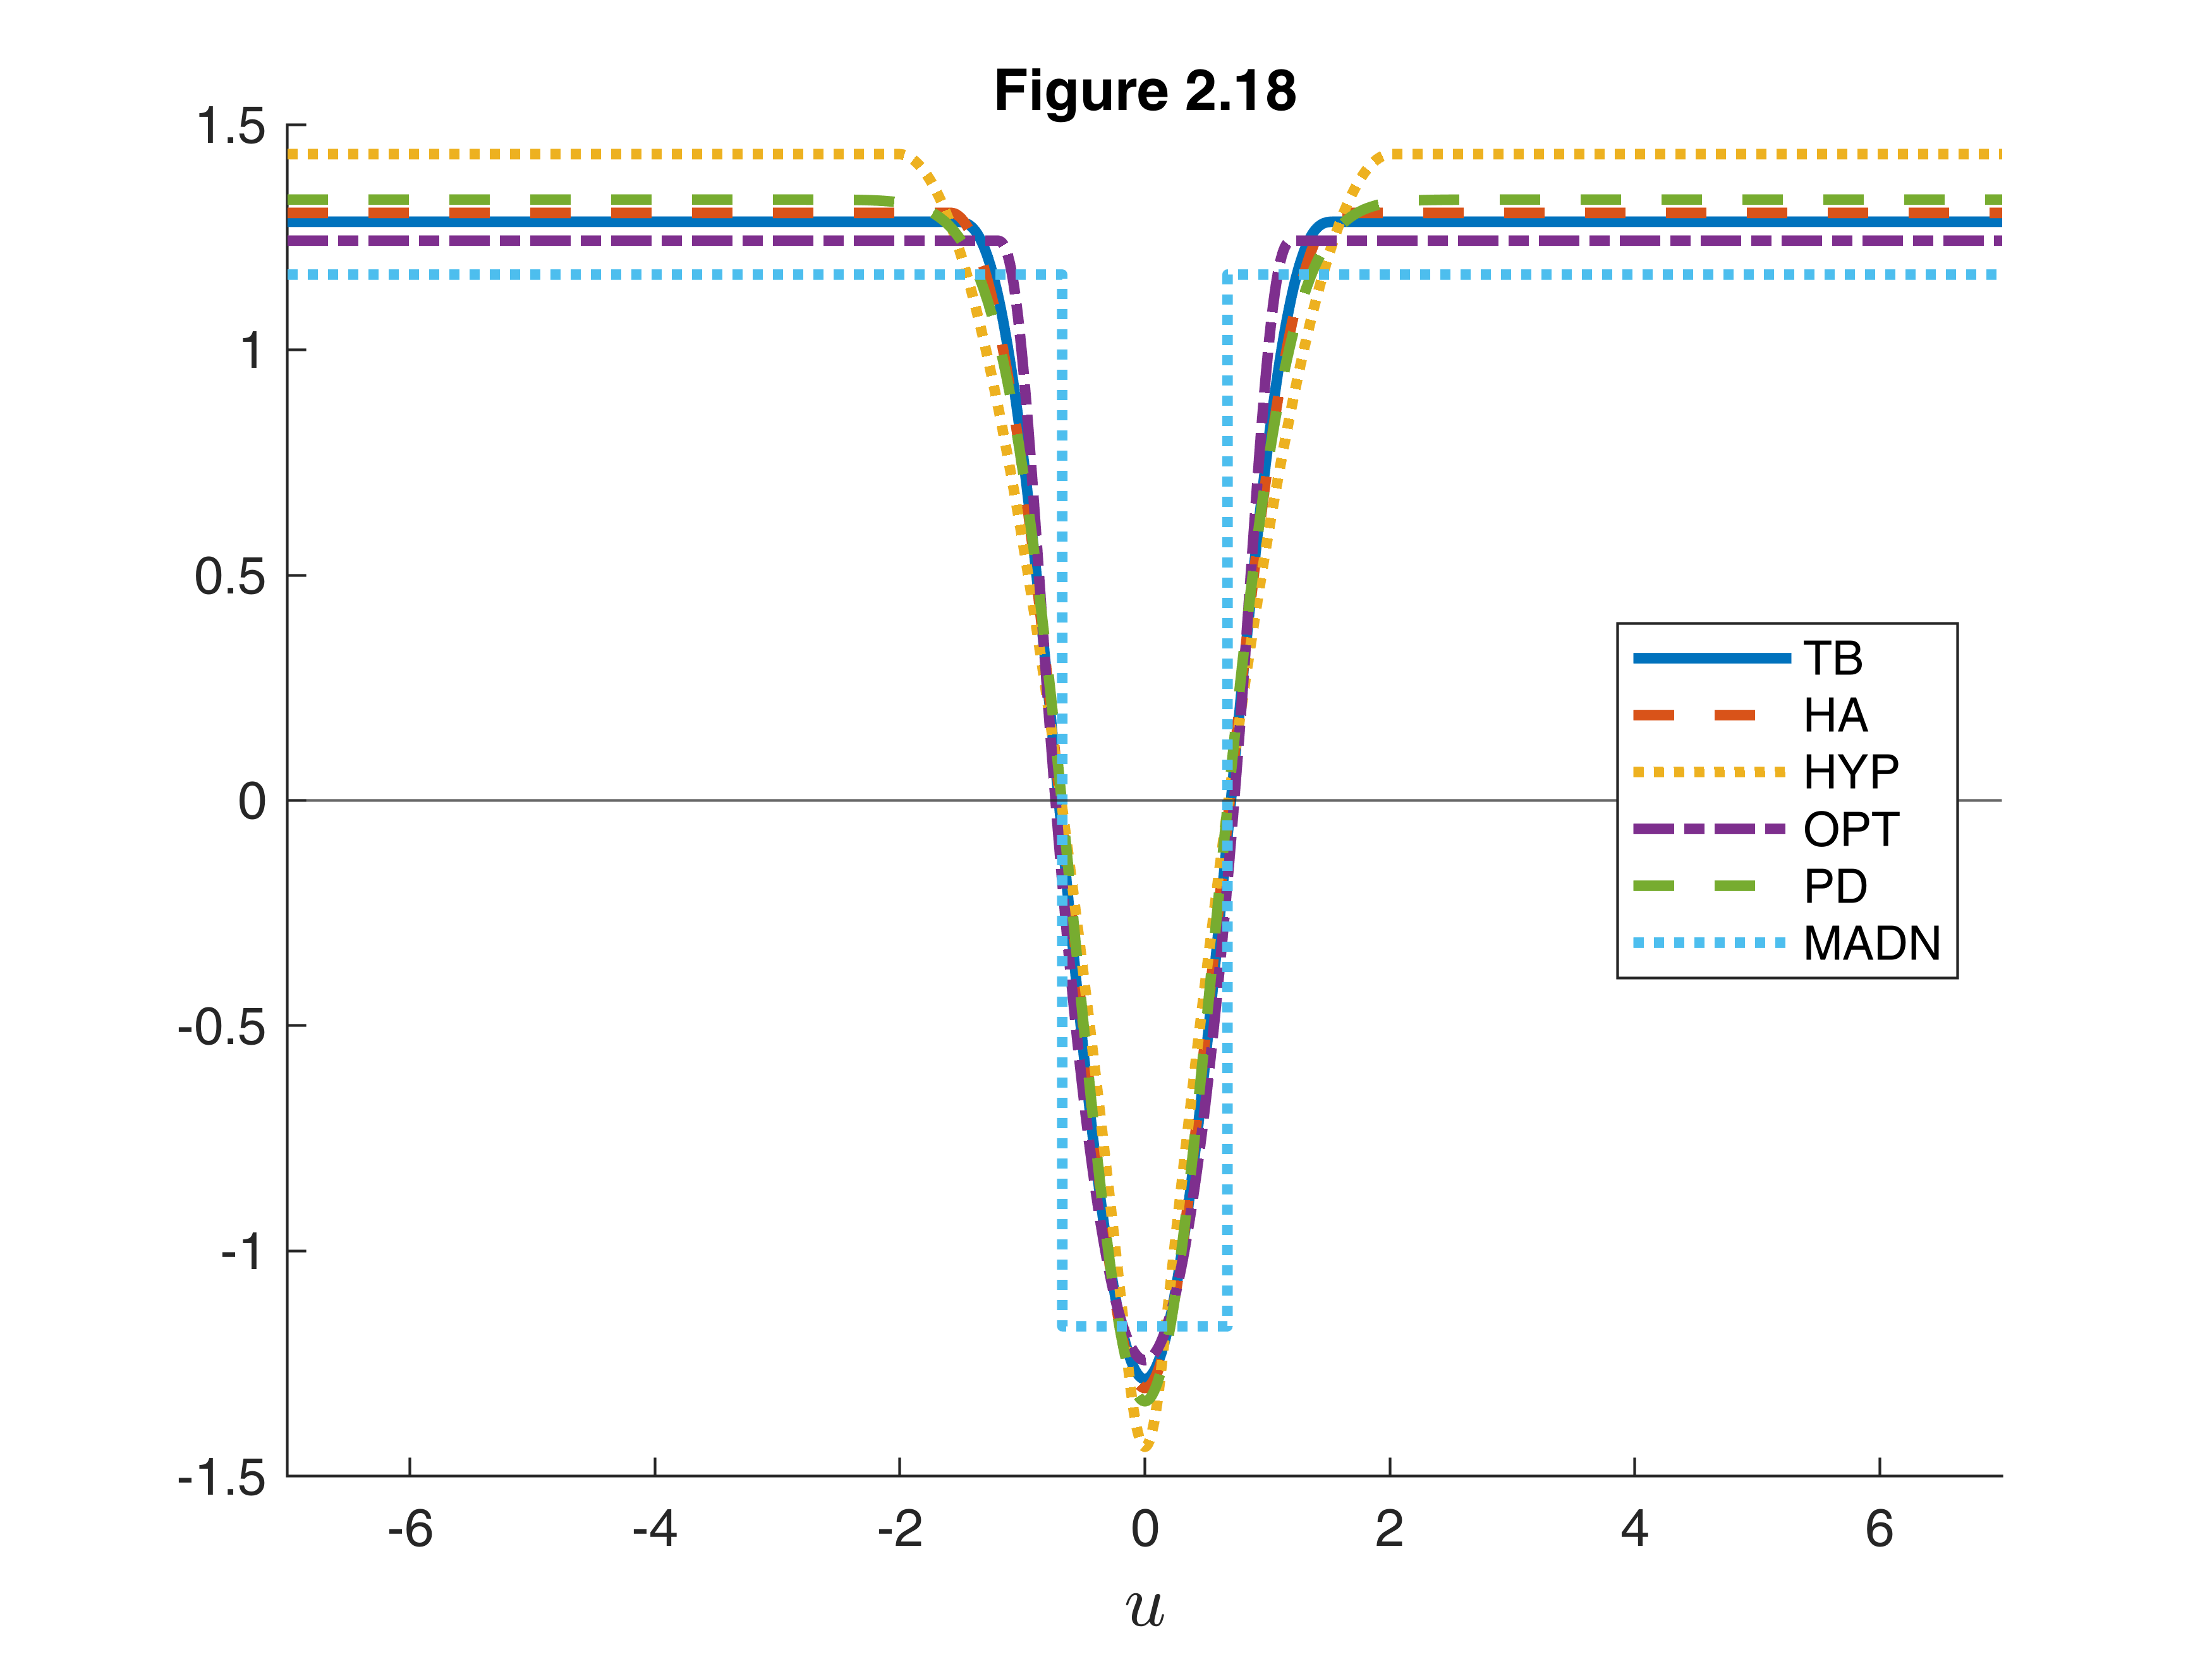

In [4]:
hold('on')

ifTB=(TBrho(x,cTB)-kTB)/iTB;
plot(x,ifTB,'LineWidth',LineWidth,'LineStyle',linst{1})

ifHA=(HArho(x,cHA)-kHA)/iHA;
plot(x,ifHA,'LineWidth',LineWidth,'LineStyle',linst{2})

ifHYP=(HYPrho(x,[cHYP,k,A,B,d])-kHYP)/iHYP;
plot(x,ifHYP,'LineWidth',LineWidth,'LineStyle',linst{3})

ifOPT=(OPTrho(x,cOPT)-kOPT)/iOPT;
plot(x,ifOPT,'LineWidth',LineWidth,'LineStyle',linst{4})

ifPD=(PDrho(x,cPD)-kPD)/iPD;
plot(x,ifPD,'LineWidth',LineWidth,'LineStyle',linst{5})

xlabel(' $u$ ','Interpreter','Latex','FontSize',FontSize)

y=1.167*sign(abs(x)-norminv(0.75));
plot(x,y,'LineWidth',LineWidth,'LineStyle',linst{6})
ylim1=-1.5;
ylim2=1.5;
ylim([ylim1 ylim2])
legend(["TB" "HA"  "HYP"  "OPT" "PD" "MADN"],'Location','best','AutoUpdate','off')

% Table 2.1, column 4
GESscabdp050=max([y ifTB ifHA ifHYP ifOPT ifPD])';

xlim([xlim1 xlim2])
yline(0)

if prin==1
    % print to postscript
    print -depsc IFscalebdp05.eps;
else
    title('Figure 2.18')
    set(gcf,"Name",'Figure 2.18')
end

## Prepare input for Figure 2.19

Compare IF of different scale estimators (eff=0.95)


In [5]:
eff=0.95;

ylim1=-2.1;
ylim2=2.1;

% Fix eff to 0.95 and find corresponding bdp
cHA=HAeff(eff,1);
rhoHAsup=HArho(200000,cHA);
% Find bdp associated to prefixed eff
[bdpHA,efftest]=HAc(cHA,1);
assert(abs(eff-efftest)<1e-5,"Lack of convergence on HA")
kHA=rhoHAsup*bdpHA;

[cHYP,A,B,d]=HYPeff(eff,1,k);
rhoHYPsup=HYPrho(200000,[cHYP,k]);
[bdpHYP,efftest]=HYPc(cHYP,1,'k',k);
assert(abs(eff-efftest)<1e-5,"Lack of convergence in HYP")
kHYP=rhoHYPsup*bdpHYP;

cOPT=OPTeff(eff,1);
rhoOPTsup=OPTrho(200000,cOPT);
[bdpOPT,efftest]=OPTc(cOPT,1);
assert(abs(eff-efftest)<1e-5,"Lack of convergence in OPT")
kOPT=bdpOPT*rhoOPTsup;

cPD=PDeff(eff);
rhoPDsup=1;
[bdpPD,efftest]=PDc(cPD);
assert(abs(eff-efftest)<1e-5,"Lack of convergence in TB")
kPD=bdpPD*rhoOPTsup;

cTB=TBeff(eff,1);
% kc = E(rho) = sup(rho)*bdp
[bdpTB,efftest]=TBc(cTB,1);
assert(abs(eff-efftest)<1e-5,"Lack of convergence in TB")
rhoTBsup=cTB^2/6;
kTB=rhoTBsup*bdpTB;

% iHU =integral(@(u)u.*(HUpsi(u,cHU)).*normpdf(u),-dd,dd);
iHA =integral(@(u)u.*(HApsi(u,cHA)).*normpdf(u),-dd,dd);
iTB =integral(@(u)u.*(TBpsi(u,cTB)).*normpdf(u),-dd,dd);
iHYP=integral(@(u)u.*(HYPpsi(u,[cHYP,k,A,B,d])).*normpdf(u),-dd,dd);
iOPT=integral(@(u)u.*(OPTpsi(u,cOPT)).*normpdf(u),-dd,dd);
iPD =integral(@(u)u.*(PDpsi(u,cPD)).*normpdf(u),-dd,dd);

## Create Figure 2.19 (fix efficiency)


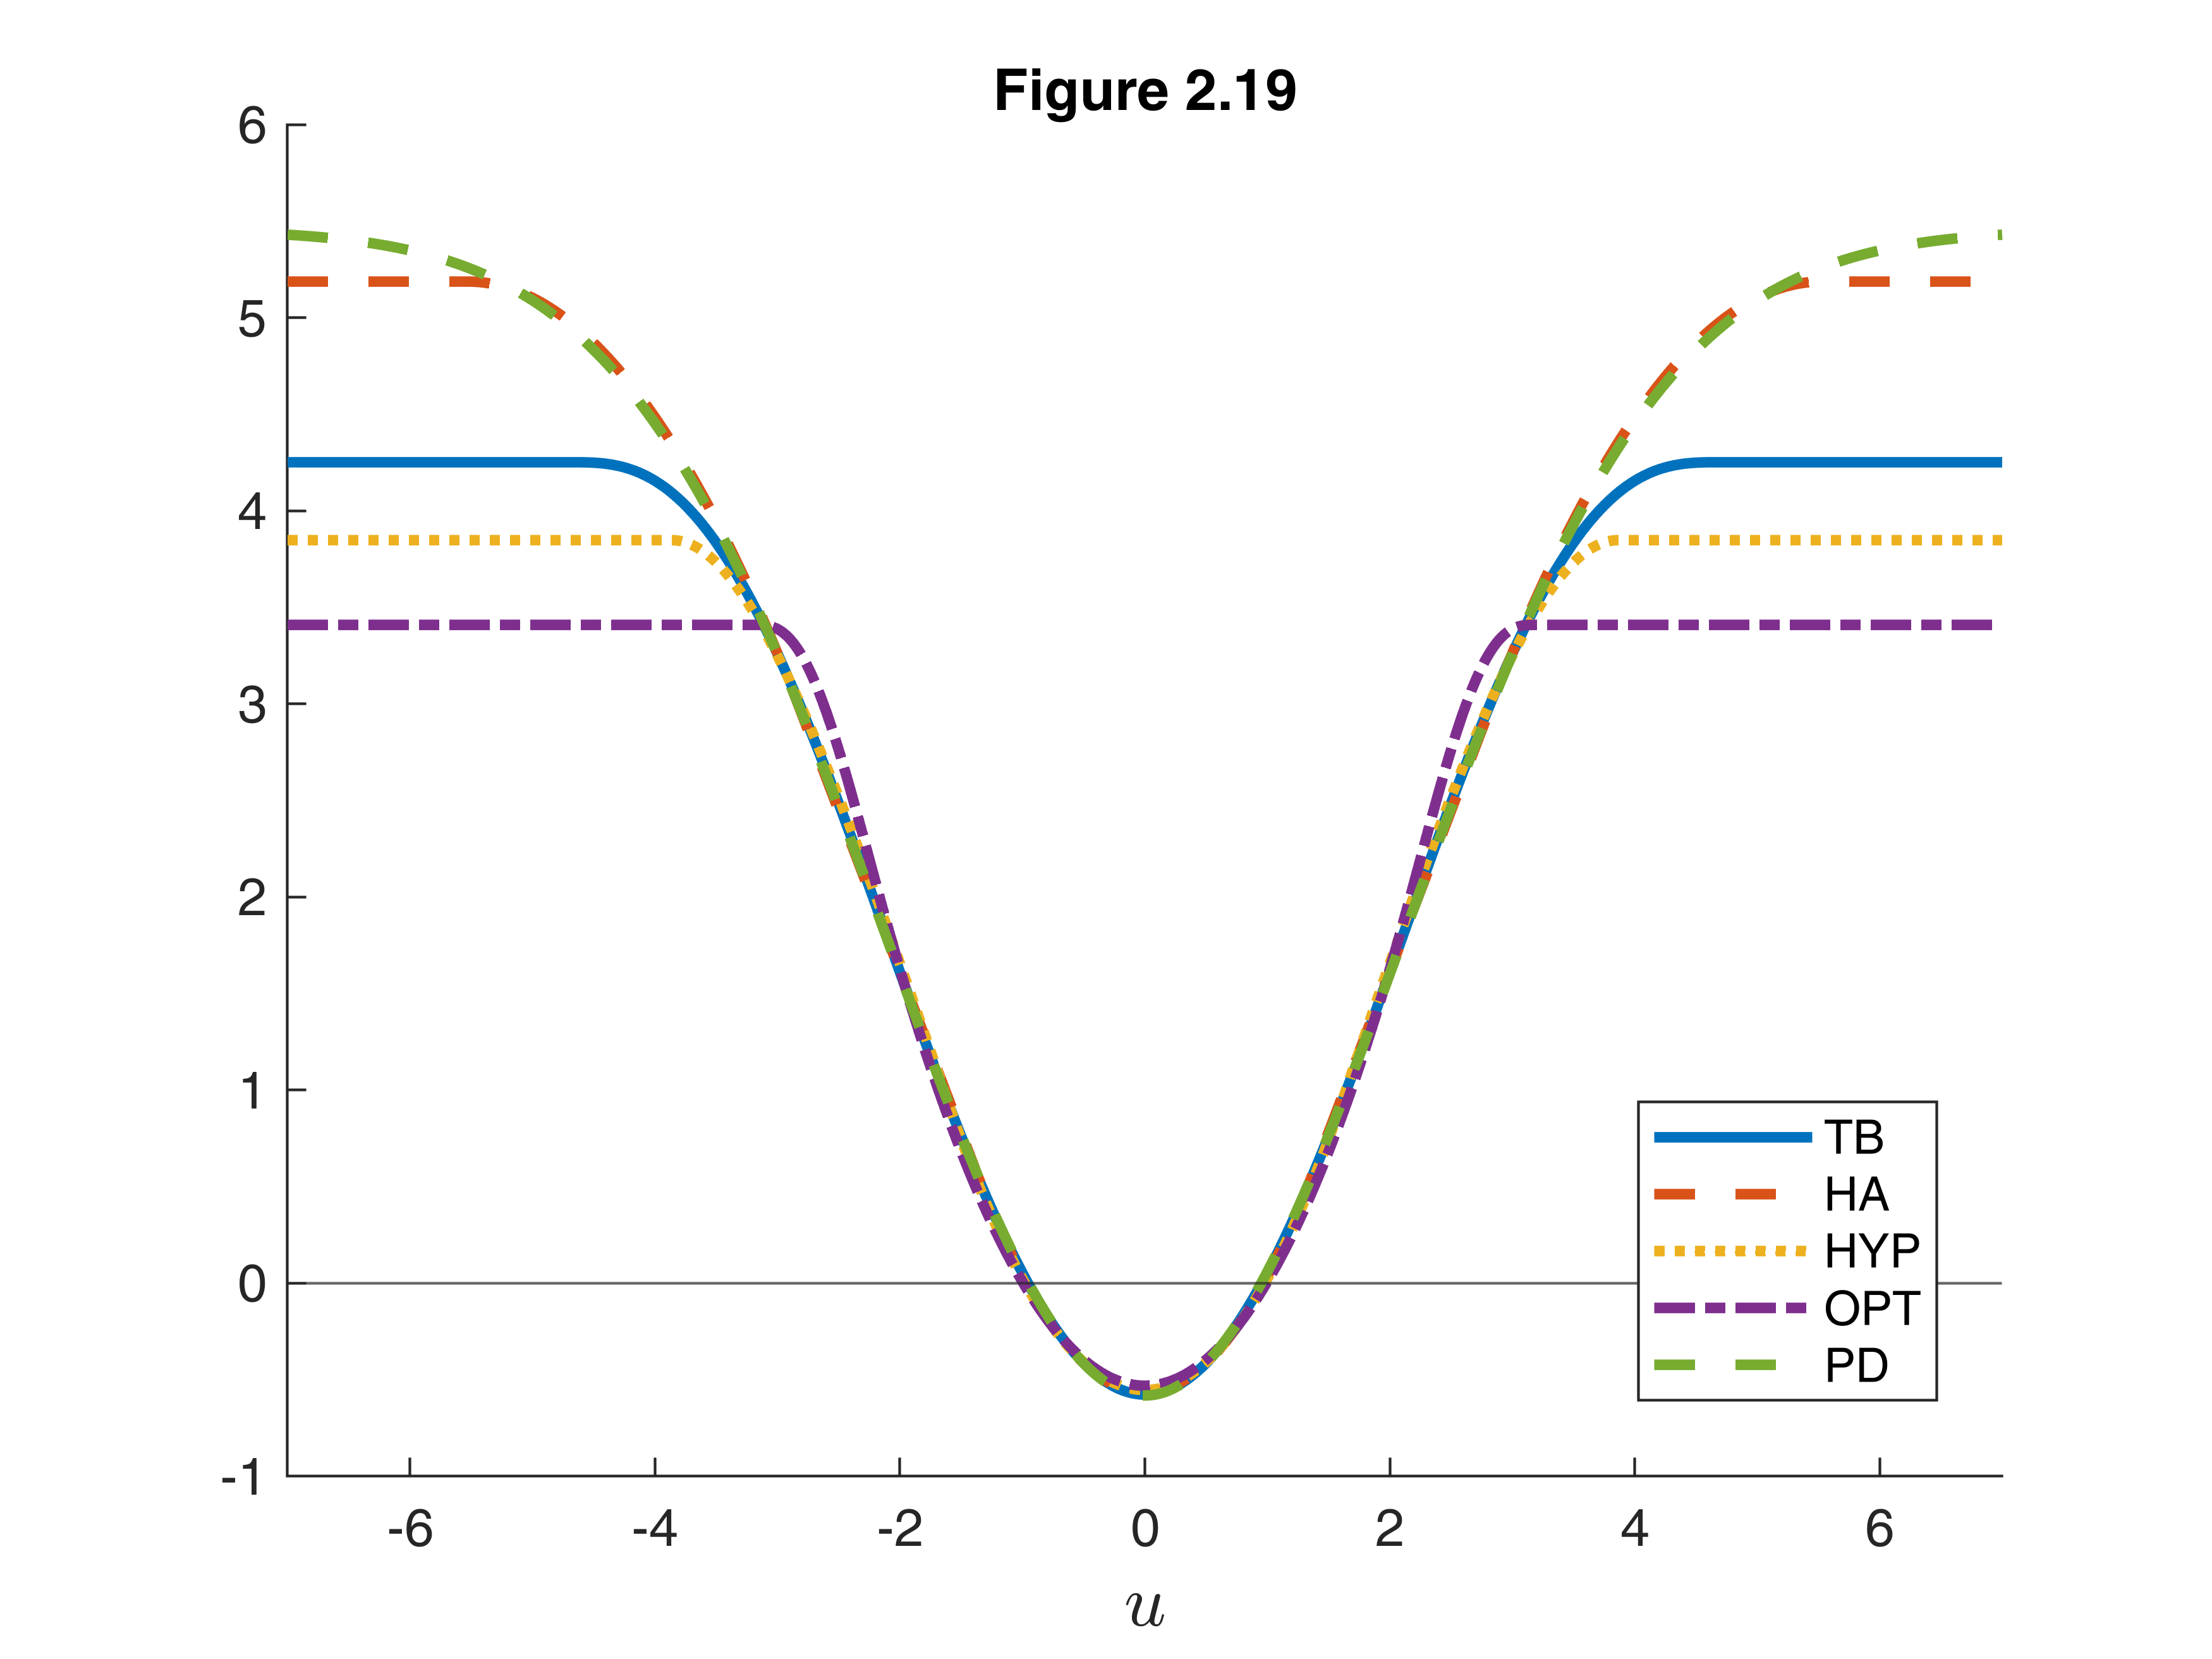

In [6]:
figure
hold('on')

ifTB=(TBrho(x,cTB)-kTB)/iTB;
plot(x,ifTB,'LineWidth',LineWidth,'LineStyle',linst{1})

ifHA=(HArho(x,cHA)-kHA)/iHA;
plot(x,ifHA,'LineWidth',LineWidth,'LineStyle',linst{2})

ifHYP=(HYPrho(x,[cHYP,k,A,B,d])-kHYP)/iHYP;
plot(x,ifHYP,'LineWidth',LineWidth,'LineStyle',linst{3})

ifOPT=(OPTrho(x,cOPT)-kOPT)/iOPT;
plot(x,ifOPT,'LineWidth',LineWidth,'LineStyle',linst{4})

ifPD=(PDrho(x,cPD)-kPD)/iPD;
plot(x,ifPD,'LineWidth',LineWidth,'LineStyle',linst{5})

xlabel(' $u$ ','Interpreter','Latex','FontSize',FontSize)
% title('Tukey biweight','FontSize',FontSizetitl)

legend(["TB" "HA"  "HYP"  "OPT" "PD"],'Location','best','AutoUpdate','off')

% Table 2.1, column 5
GESscaeff095=max([ifTB ifHA ifHYP ifOPT ifPD])';

xlim([xlim1 xlim2])
yline(0)

if prin==1
    % print to postscript
    print -depsc IFscaleeff095.eps;
else
    title('Figure 2.19')
    set(gcf,"Name",'Figure 2.19')
end

In [7]:

disp('Columns 3 and 4 of Table 2.1')

Columns 3 and 4 of Table 2.1

In [8]:
GESscabdp050All=[NaN; GESscabdp050];
GESscaeff095All=[NaN; NaN; GESscaeff095];
namRow=["Median" "MADn" "Tukey biweight" "Hampel" "Hyperboloc" "Optimal" "Power divergence"];
namCol=["bdp=0.5" "eff=0.95"];
GESbdpeff=array2table([GESscabdp050All GESscaeff095All],"RowNames",namRow,"VariableNames",namCol);
disp(GESbdpeff)

                        bdp=0.5    eff=0.95
                        _______    ________
    Median                 NaN         NaN 
    MADn                 1.167         NaN 
    Tukey biweight      1.2842      4.2512 
    Hampel              1.3038      5.1866 
    Hyperboloc          1.4343      3.8478 
    Optimal             1.2422      3.4089 
    Power divergence    1.3333      5.4294

In [9]:

%InsideREADME